## *Linear Regression model* :

## Complete Linear Regression Formulas:

### Slope (m):
$$m = \frac{n(\sum xy) - (\sum x)(\sum y)}{n(\sum x^2) - (\sum x)^2}$$

---

### Intercept (c) - Method 1: Dependent on Slope (m)
$$c = \frac{\sum y - m \sum x}{n}$$

### Intercept (c) - Method 2: Independent of Slope (m)
$$c = \frac{(\sum y)(\sum x^2) - (\sum x)(\sum xy)}{n(\sum x^2) - (\sum x)^2}$$

Where:
- $n$ = number of data points
- $\sum x$ = sum of all x values
- $\sum y$ = sum of all y values  
- $\sum xy$ = sum of products of corresponding x and y values
- $\sum x^2$ = sum of squares of x values

\(n\) is the number of data points.
\(Σ\) denotes the sum.

# Gradient Descent Formulas

## Linear Regression - Gradient Descent

### Cost Function (Mean Squared Error):
$$J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$$

### Hypothesis Function:
$$h_\theta(x) = \theta_0 + \theta_1 x$$

### Gradient Descent Update Rules:
$$\theta_0 := \theta_0 - \alpha \frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1)$$

$$\theta_1 := \theta_1 - \alpha \frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1)$$

### Partial Derivatives:
$$\frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})$$

$$\frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x^{(i)}$$

### Final Update Rules:
$$\theta_0 := \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})$$

$$\theta_1 := \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x^{(i)}$$

---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
df_sal = pd.read_csv("D:/vivek/COLLEGE/MLDL/Experiment_2/Salary_Data.csv")

In [10]:
df_sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


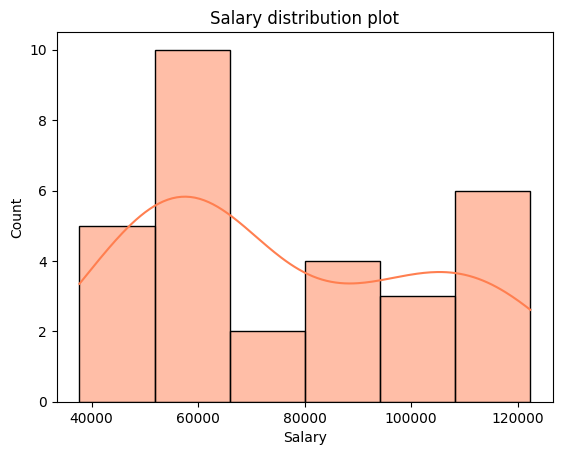

In [13]:
plt.title("Salary distribution plot")
sns.histplot(df_sal['Salary'],kde=True,color='coral')
plt.show()

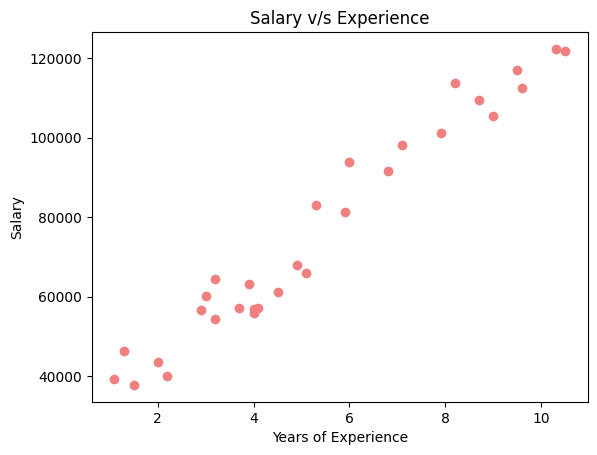

In [17]:
plt.scatter(df_sal['YearsExperience'] , df_sal['Salary'],color='lightCoral')
plt.title('Salary v/s Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [19]:
X = df_sal.iloc[:,:1]
y = df_sal.iloc[:,1].values

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

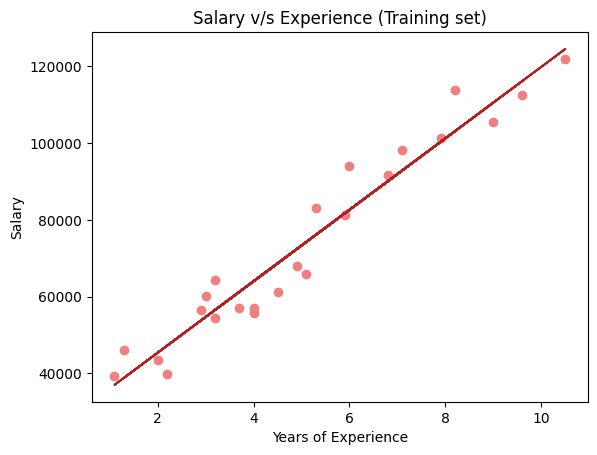

In [22]:
plt.scatter(X_train,y_train, color='lightCoral')
plt.plot(X_train,y_pred_train,color = 'firebrick')
plt.title('Salary v/s Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


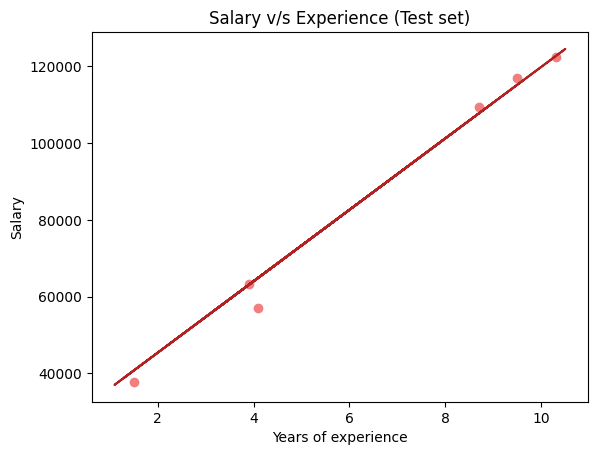

In [23]:
plt.scatter(X_test,y_test,color='lightCoral')
plt.plot(X_train,y_pred_train , color = 'firebrick')
plt.title('Salary v/s Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [24]:
print(f"Coefficent (m) : {regressor.coef_[0]}")
print(f"Intercept (b) : {regressor.intercept_}")

Coefficent (m) : 9312.575126729189
Intercept (b) : 26780.09915062818


In [26]:
x = df_sal['YearsExperience'].values
y = df_sal['Salary'].values

n = len(x)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x *y)
sum_x2 = np.sum(x ** 2)

In [28]:
m = ( n  * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
b = (sum_y - m * sum_x) / n

print(f"Manual Derivation coefficient : {m}")
print(f"Manual Derivation fo iAntercept : {b}")

Manual Derivation coefficient : 9449.962321455077
Manual Derivation fo iAntercept : 25792.200198668685


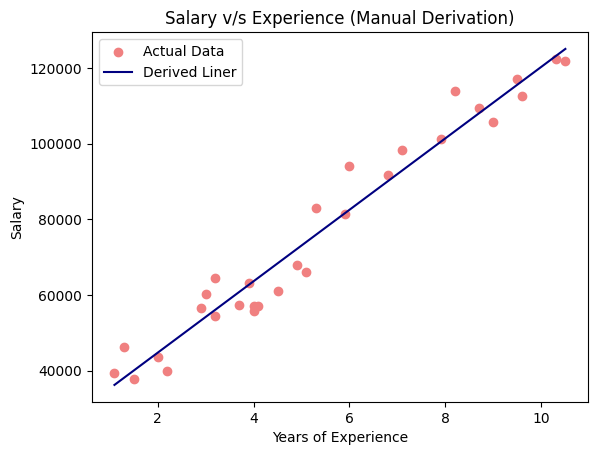

In [29]:
plt.scatter(x , y, color = 'lightCoral', label='Actual Data')
plt.plot( x,m*x + b,color ='navy',label='Derived Liner')
plt.title('Salary v/s Experience (Manual Derivation)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

# Gradient Descent Derivation

In [32]:
x_b = np.c_[np.ones((x.shape[0] , 1 )),x]

In [33]:
Learning_rate = 0.01
iteration = 1000
m - np.random.rand(2)

array([9449.42429148, 9449.62362519])

In [36]:
def compute_gradients(X,y,m):
    y_pred = X.dot(m)
    error = y_pred - y
    cost = (1/n) * np.sum(error ** 2)
    gradient = (2 / n) * X.T.dot(error)

    return gradient,cost

In [37]:
cost_history = []
for i in range(iteration):
    gradient , cost = compute_gradients(x_b , y,m)
    m = m -Learning_rate * gradient
    cost_history.append(cost)

In [38]:
print(f"Fianl slop (m1) : {m[1]}")
print(f"Final Intercept (m0) : {m[0]}")

Fianl slop (m1) : 9483.940188232496
Final Intercept (m0) : 25563.232372731574


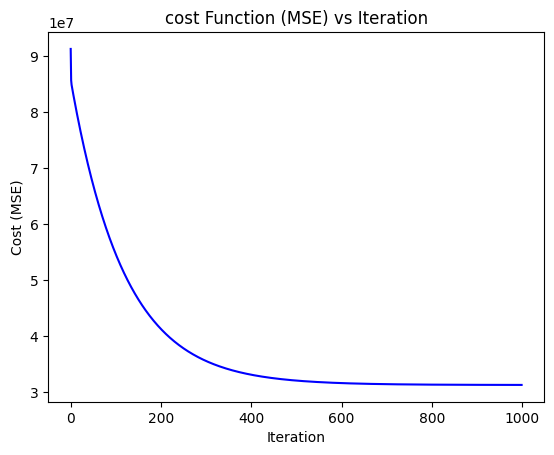

In [39]:
plt.plot(range(iteration) , cost_history , color='blue')
plt.title("cost Function (MSE) vs Iteration")
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.show()